## Libary which we are using

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/kaggle/input/h1bcsv/h1b.csv"

In [3]:
# Reading the csv file into a Pandas dataframe

df = pd.read_csv(path)

In [4]:
df.head(5)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


## We will start by analyzing the distribution of petitions based on their case status. The following pie chart shows the distribution of petitions by their case status.


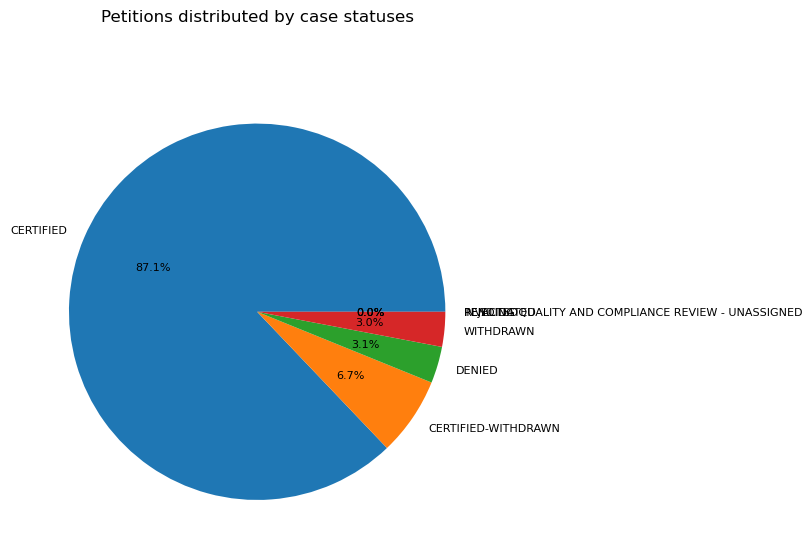

In [6]:
# Counting the number of H-1B visa petitions for each case status
case_status_counts= df['CASE_STATUS'].value_counts()

# Creating a figure and axis object to plot the pie chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting the pie chart with the case status counts and their respective percentages
plt.pie(case_status_counts, labels=case_status_counts.index, autopct='%1.1f%%', textprops={'fontsize': 8})


# Setting the title of the chart
plt.title('Petitions distributed by case statuses', y=1.1)

# Ensuring that the chart is properly displayed and not cut off
plt.tight_layout()

# Displaying the chart
plt.show()

## Top employers filing the petitions:

Next, we will look at the top employers who filed the most H-1B visa petitions. The following bar chart shows the top 20 employers who filed the most petitions.

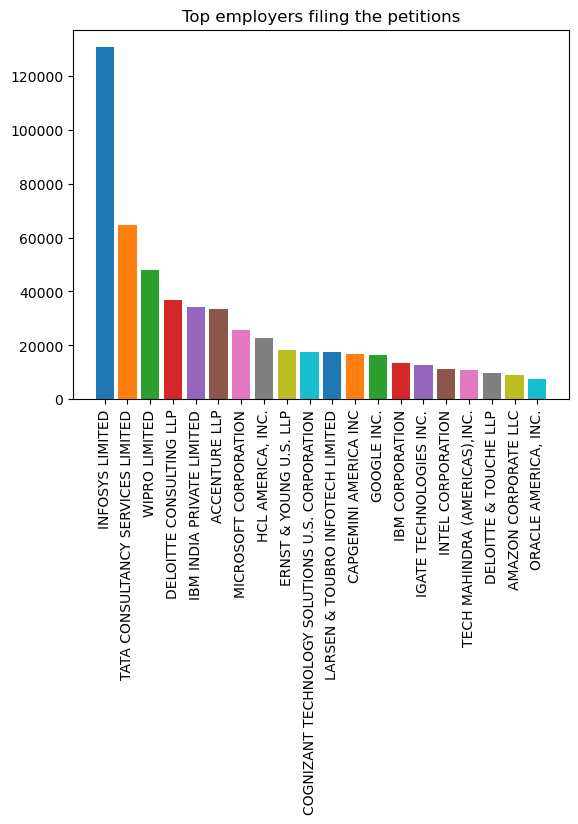

In [7]:
# Counting the number of H-1B visa petitions filed by each employer and selecting the top 20
top_employers = df['EMPLOYER_NAME'].value_counts().nlargest(20)

# Assign a different color to each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the bar chart with the number of petitions filed by each employer
plt.bar(top_employers.index, top_employers.values, color=colors)

# Rotating the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Setting the title of the chart
plt.title('Top employers filing the petitions')

# Displaying the chart
plt.show()

## Top 15 companies that filed the most visa application:

We will now look at the top 15 companies that filed the most visa applications. The following bar chart shows the top 15 companies.


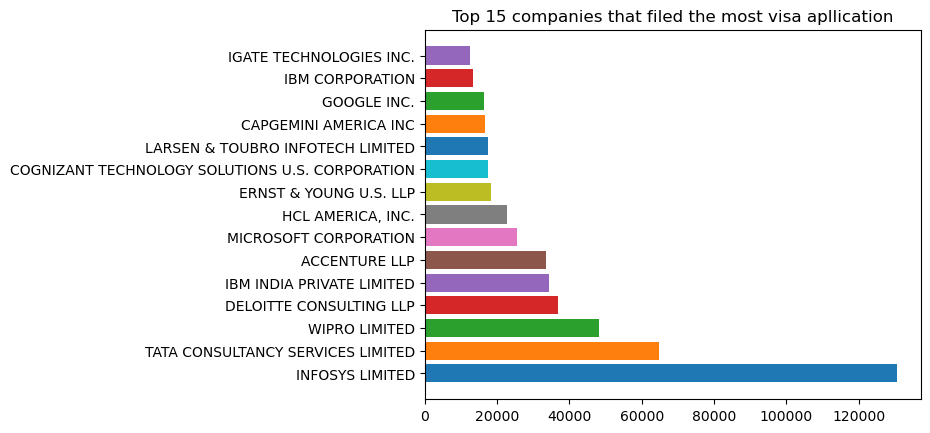

In [8]:
# Group the data by employer name, calculate the size of each group (i.e., count the number of visa applications filed), 
# sort the values in descending order, and select the top 15 companies
top_companies = df.groupby('EMPLOYER_NAME').size().sort_values(ascending=False).head(15)


# Create a horizontal bar chart with the company names on the y-axis and the number of visa applications on the x-axis
# Set the color of the bars using the colors list
plt.barh(top_companies.index, top_companies.values, color=colors)

# Add a title to the plot
plt.title('Top 15 companies that filed the most visa apllication')

# Display the plot
plt.show()

## Top employers granting maximum prevailing wages:

Next, we will analyze the top employers who granted the highest prevailing wages. The following bar chart shows the top 10 employers.



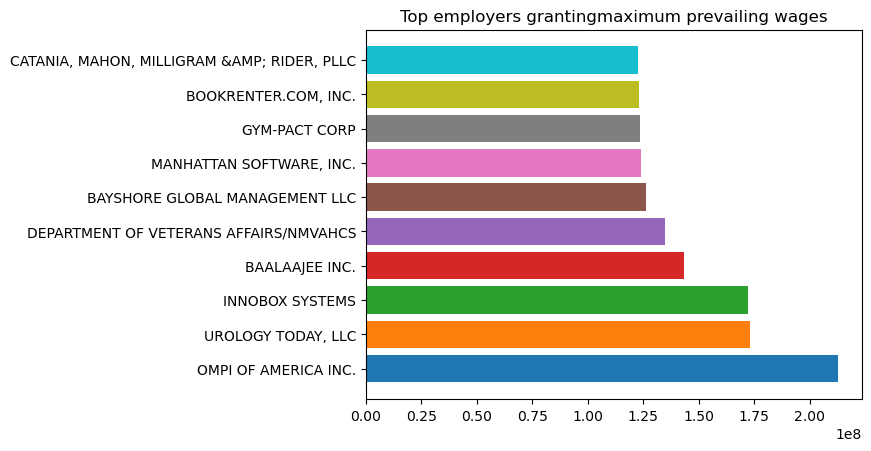

In [9]:
#groups the data by employer name and calculates the mean of the prevailing wages for each group.
#selects the top 10 employers with the highest mean prevailing wages.
top_wage_employers = df.groupby('EMPLOYER_NAME')['PREVAILING_WAGE'].mean().nlargest(10)

#creates a horizontal bar chart with the top 10 employers on the y-axis and their mean prevailing wages on the x-axis. The color argument assigns a different color to each bar.
plt.barh(top_wage_employers.index, top_wage_employers.values, color=colors)

# Add a title to the plot
plt.title('Top employers grantingmaximum prevailing wages')

# Display the plot
plt.show()